In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("responses (55).csv")
data.drop(columns=['Timestamp'], inplace=True)
data.drop(index=[21, 129], inplace=True)
data.loc[62, 'Sex'] = data.loc[136, 'Sex'] = 'Other'
data['Where do you live? (name of village/town/city)'] = data['Where do you live? (name of village/town/city)'].apply(lambda x: x.strip().lower())

In [3]:
working_data = data.copy()

### column renaming

In [4]:
column_rename = {
    'Where do you live? (name of village/town/city)': 'P1',
    'Do you live in a rural or urban area?': 'P2',
    'Sex': 'P3',
    'Age': 'P4',
    'Your medium of schooling': 'P5',
    'Your highest educational qualification': 'P6',
    'Your monthly household income (in INR)': 'P7',
    'Who do you live with in your residence (i.e., where you currently reside)? ': 'P8',
    "Your father's highest educational qualification": 'P9',
    "Your mother's highest educational qualification": 'P10',
    'Who is responsible for making day-to-day decisions about money in your household?': 'F1',
    'Do you prepare a budget to keep track of necessary expenses and savings?': 'F2',
    'How do you keep track of your monthly expenses?': 'F3',
    'In the past 12 months have you been personally saving money in any of the following ways?': 'F4',
    'What percentage of your total monthly income (or allowance) do you keep aside for active savings?': 'F5',
    'What do you usually do to grow the money that you manage to save each month?': 'F6',
    'If you lost your main source of income today, how long would you be able to continue your current living expenses without borrowing money or moving house?': 'F7',
    'In the last 12 months have you done the following?': 'S1',
    'For an online payment that has to be made by card, which one would you opt for generally?': 'A1',
    'You are looking to buy new headphones online and you have 2 choices, out of which you need to choose one. The first set of headphones are priced at ₹700, while the other set is marked at ₹1,000 with a 30% discount. Both the sets are similar in terms of quality, performance, and durability.': 'A2',
    'From the list given below, identify items that are classified as assets:': 'K1',
    "Suppose you buy a piece of land for  ₹5 lakhs. After 10 years, you sell this land for ₹7 lakhs. How much would your profit be after selling the land? (Assume you don't have to pay any kind of taxes)": 'K2',
    'You have borrowed ₹100 from a friend. Which would be the lower amount to pay back: ₹105 or ₹100 plus 3%?': 'K3',
    'Assume that the income tax rate for an annual income between ₹1 lakh and ₹2 lakhs is 5% and for an annual income between ₹2 lakhs and ₹4 lakhs, the income tax rate is 10%. If your annual income is ₹3 lakhs, your income tax would be:': 'K4',
    'You want to buy a phone worth ₹25,000 and you decide to save ₹5,000 each month. In your third month of savings period (which would be of 5 months), a relative gifts you ₹4,000 in form of cash. What would you most likely do with this money?' : 'K5',
    'Just when you were about to reach your target of saving ₹25,000 for your new phone, you hear about another new, different model worth ₹22,000 and see a huge number of people booking it, along with good recommendations from a lot of well known experts and analysts.': 'K6',
    "You have ₹200 to spend on lunch and you're hungry. You buy some food items worth ₹180 and you feel full again after eating. You are now left with ₹20 of your lunch budget. What are you most likely to do?": 'K7',
    'Which one of the following investments do you consider as safer: putting your entire money in one business/investment, or putting your money into multiple businesses/investments?': 'K8',
    "You lend Rs. 25 to a friend and they return you Rs. 25 the next day. How much interest did they pay on this loan?": 'K9',
    "Say someone puts Rs. 100 into a tax free, no fee savings account with guaranteed interest is 2% per year. What will be the amount in the account after 5 years?": 'K10',
    "Suppose 5 brothers are given Rs. 1000 and asked to divide among themselves. However they have to wait for a year to get the money. If inflation stays at X%, then in 1 year will they be able to buy": 'K11'
}

In [5]:
columns = [f"P{i}" for i in range(2,11)] + [f"F{i}" for i in range(1,8)] + ["S1", "A1", "A2"] + [f"K{i}" for i in range(1,12)]
renamed_data = data.rename(columns=column_rename)[columns].copy()

In [6]:
renamed_data.tail(n=2)

,P2,P3,P4,P5,P6,P7,P8,P9,P10,F1,...,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11
185,Urban,Male,21,Bengali,Graduate,"< 20,000",Alone,Graduate,10th pass or less,You make these decisions with someone else,...,You will lose money,Rs. 100 plus 3%,"Rs. 30,000",Add it to your savings for your new phone and ...,"Seeing the huge demand, you decide to buy ₹22,...",You keep the remaining money with yourself and...,Multiple businesses/investment,No interest,More than Rs. 110,Less than they can buy today
186,Urban,Male,21,Bengali,12th pass,"< 20,000",With other adult relatives,12th pass,Graduate,You make these decisions with someone else,...,Rs. 2 lakhs,Rs. 100 plus 3%,"Rs. 30,000",Add it to your savings for your new phone and ...,"You stick with the ₹25,000 model",You keep the remaining money with yourself and...,Multiple businesses/investment,No interest,More than Rs. 110,Not sure


### other stuff

In [7]:
data['Sex'].value_counts()

Male      129
Female     54
Other       2
Name: Sex, dtype: int64

In [8]:
data[data.Sex.isin(['Other'])]

,Where do you live? (name of village/town/city),Do you live in a rural or urban area?,Sex,Age,Your monthly household income (in INR),"Who do you live with in your residence (i.e., where you currently reside)?",Your medium of schooling,Your highest educational qualification,Your father's highest educational qualification,Your mother's highest educational qualification,...,"Suppose you buy a piece of land for ₹5 lakhs. After 10 years, you sell this land for ₹7 lakhs. How much would your profit be after selling the land? (Assume you don't have to pay any kind of taxes)",You have borrowed ₹100 from a friend. Which would be the lower amount to pay back: ₹105 or ₹100 plus 3%?,"Assume that the income tax rate for an annual income between ₹1 lakh and ₹2 lakhs is 5% and for an annual income between ₹2 lakhs and ₹4 lakhs, the income tax rate is 10%. If your annual income is ₹3 lakhs, your income tax would be:","You want to buy a phone worth ₹25,000 and you decide to save ₹5,000 each month. In your third month of savings period (which would be of 5 months), a relative gifts you ₹4,000 in form of cash. What would you most likely do with this money?",You have ₹200 to spend on lunch and you're hungry. You buy some food items worth ₹180 and you feel full again after eating. You are now left with ₹20 of your lunch budget. What are you most likely to do?,"You are looking to buy new headphones online and you have 2 choices, out of which you need to choose one. The first set of headphones are priced at ₹700, while the other set is marked at ₹1,000 with a 30% discount. Both the sets are similar in terms of quality, performance, and durability.",You lend Rs. 25 to a friend and they return you Rs. 25 the next day. How much interest did they pay on this loan?,"Say someone puts Rs. 100 into a tax free, no fee savings account with guaranteed interest is 2% per year. What will be the amount in the account after 5 years?","Suppose 5 brothers are given Rs. 1000 and asked to divide among themselves. However they have to wait for a year to get the money. If inflation stays at X%, then in 1 year will they be able to buy","Just when you were about to reach your target of saving ₹25,000 for your new phone, you hear about another new, different model worth ₹22,000 and see a huge number of people booking it, along with good recommendations from a lot of well known experts and analysts."
62,kolkata,Urban,Other,22,"> 60,000",With other adult relatives,English,12th pass,Graduate,Graduate,...,Less than Rs. 2 lakhs,Rs. 100 plus 3%,"Rs. 30,000",Add it to your savings for your new phone and ...,You keep the remaining money with yourself and...,You buy the second set.,No interest,Exactly Rs. 110,Less than they can buy today,"You stick with the ₹25,000 model"
136,bangalore,Urban,Other,18,"> 60,000",With children under the age of 18,English,Ph.D.,Ph.D.,Ph.D.,...,You will lose money,Rs. 100 plus 3%,"Rs. 30,000",Use it for some other personal expense as this...,Buy some light snack or beverage worth ₹20 to ...,You buy the first set.,No interest,More than Rs. 110,More with their share of money than they can b...,"You stick with the ₹25,000 model"


In [31]:
# data.drop(index=[21, 129], inplace=True)

In [32]:
# data.loc[62, 'Sex'] = data.loc[136, 'Sex'] = 'Other'

In [9]:
data.loc[136, 'Sex']

'Other'

In [33]:
# data['Where do you live? (name of village/town/city)'] = data['Where do you live? (name of village/town/city)'].apply(lambda x: x.strip().lower())

In [10]:
print(data['Where do you live? (name of village/town/city)'].unique())

['kolkata' 'dakshineswar' 'asansol' 'chandannagar' 'barasat' 'nagpur'
 'jalpaiguri' 'raipur' 'malda' 'chennai' 'delhi' 'mumbai' 'rangpo'
 'jamshedpur' 'siliguri' 'purulia' 'golaghat' 'bhubaneswar' 'durgapur'
 'kalimpong' 'egattur' 'bagdogra' 'mount abu' 'bhusawal' 'dhanbad'
 'lucknow' 'santragachi' 'bongaigaon' 'jabalpur' 'gangtok' 'trivandrum'
 'varanasi' 'malappuram' 'azamgarh' 'bangalore' 'india' 'bally, howrah'
 'kanpur' 'bandel' 'hindmotor' 'halisahar' 'guwahati' 'barrackpore'
 'alipurduar' 'santipur' 'domjur' 'sodepur' 'shyamnagar' 'chinsurah'
 'town' 'diamond harbour' 'vadodara' 'baruipur' 'sansat' 'palashi'
 'berhampur' 'mawa' 'mahestala, kolkata' 'bandel, hooghly'
 'tanda, ambedkar nagar' 'coochbehar' 'berhampore'
 'pittsburgh, pennsylvania, united states' 'serampore' 'sudarshan'
 'bhadreswar' 'mankundu' 'rishra' 'new delhi' 'burdwan' 'midnapore'
 'rampurhat' 'pandaveswar' 'kolkats' 'bolpur' 'kodalia' 'madhyamgram'
 'bally' 'mohanpur' 'belgharia']


In [11]:
data['Where do you live? (name of village/town/city)'].value_counts() == 1

kolkata         False
chennai         False
mumbai          False
asansol         False
chandannagar    False
                ...  
guwahati         True
barrackpore      True
alipurduar       True
santipur         True
belgharia        True
Name: Where do you live? (name of village/town/city), Length: 80, dtype: bool

<AxesSubplot:xlabel='Age', ylabel='Density'>

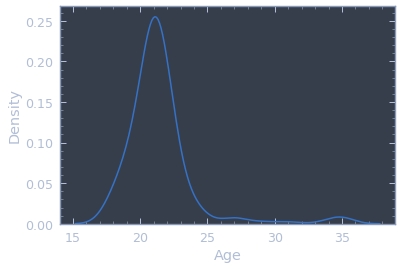

In [13]:
sns.kdeplot(data.Age)

/home/deepmalya/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


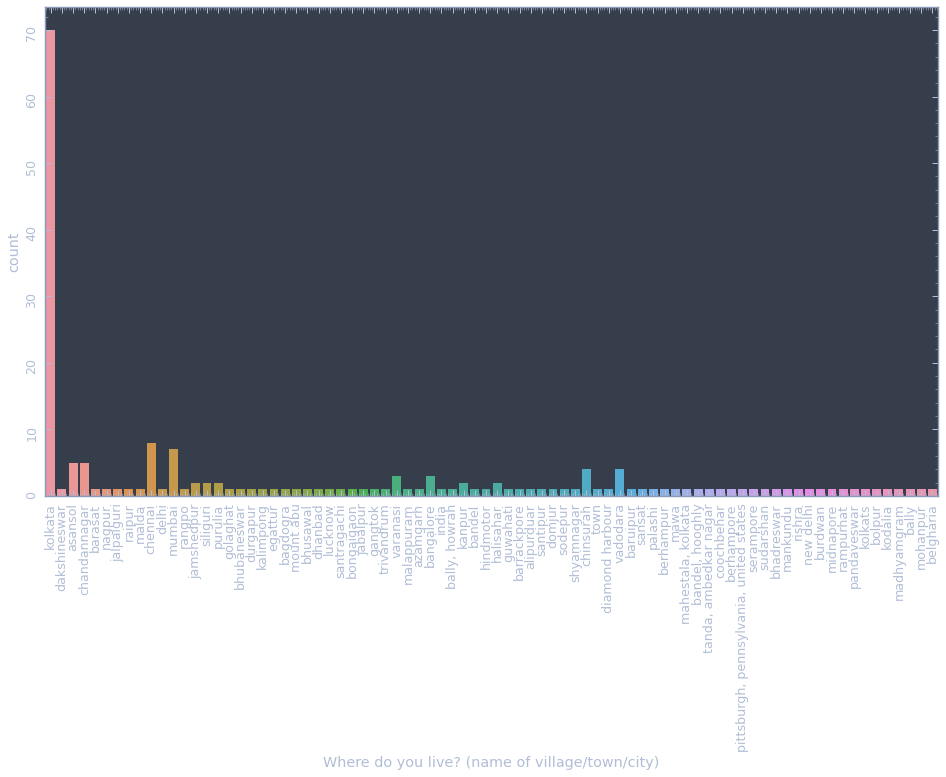

In [15]:
plt.figure(figsize= (16,9))
sns.countplot(data['Where do you live? (name of village/town/city)'])
plt.tick_params(rotation = 90)

In [16]:
y = 'How do you keep track of your monthly expenses?'
x = 'Age'

# 18 - 21, 21 - 24, 24 - 27, 27 - 30, 30 - 33, 33+

working_data['Age_group'] = pd.cut(working_data['Age'], bins=[18,21,24,27,30,33,36], include_lowest=True, right=False)

In [17]:
working_data.groupby(['Age_group', 'Do you prepare a budget to keep track of necessary expenses and savings?']).aggregate(np.mean)

Age
Age_group Do you prepare a budget to keep track of necess...           
[18, 21)  No, I do not keep a written record of my expens...  19.454545
          Yes, I do so each month                             19.250000
          Yes, but only sometimes                             19.166667
[21, 24)  No, I do not keep a written record of my expens...  21.470588
          Yes, I do so each month                             21.390244
          Yes, but only sometimes                             21.545455
[24, 27)  No, I do not keep a written record of my expens...  24.000000
          Yes, I do so each month                             24.200000
          Yes, but only sometimes                             24.000000
[27, 30)  No, I do not keep a written record of my expens...  27.000000
          Yes, I do so each month                             29.000000
          Yes, but only sometimes                             27.000000
[30, 33)  No, I do not keep a written record of my expens...        NaN
          Yes, I do so each month                             31.000000
          Yes, but only sometimes                                   NaN
[33, 36)  No, I do not keep a written record of my expens...  35.000000
          Yes, I do so each month                             35.000000
          Yes, but only sometimes                             34.000000

In [18]:
working_data['Age_group'].value_counts()

[21, 24)    119
[18, 21)     50
[24, 27)      7
[27, 30)      4
[33, 36)      4
[30, 33)      1
Name: Age_group, dtype: int64

In [23]:
agegrp_f2_pivot = pd.pivot_table(working_data, columns=['Age_group'], index='Do you prepare a budget to keep track of necessary expenses and savings?', aggfunc='count').iloc[:,:6]

In [24]:
agegrp_f2_pivot.index = ['No budget', 'Yes budget sometimes', 'Yes budget always']
agegrp_f2_pivot.columns = ["[18, 21)","[21, 24)","[24, 27)","[27, 30)","[30, 33)","[33, 36)"]

In [25]:
agegrp_f2_pivot

,"[18, 21)","[21, 24)","[24, 27)","[27, 30)","[30, 33)","[33, 36)"
No budget,22,34,1,2,0,1
Yes budget sometimes,16,41,5,1,1,2
Yes budget always,12,44,1,1,0,1


<AxesSubplot:>

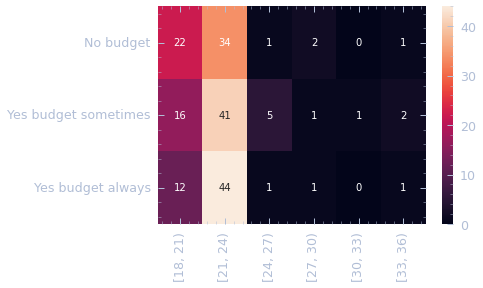

In [28]:
sns.heatmap(agegrp_f2_pivot, annot = True)

<AxesSubplot:>

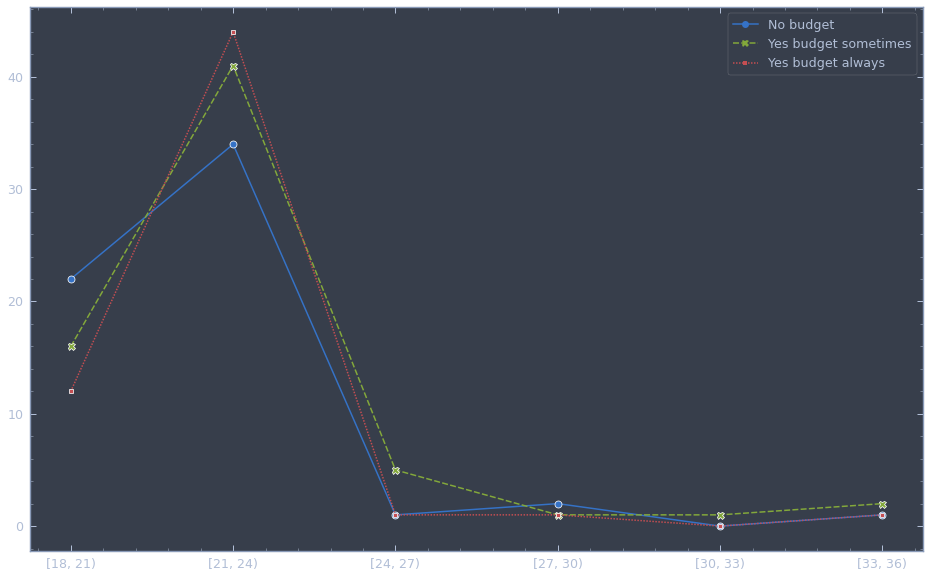

In [29]:
plt.figure(figsize=(16, 10))
sns.lineplot(data = agegrp_f2_pivot.T, markers=True)